## Importing Necessary Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

- Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots
- 5 ML algo used from  sklearn library at once - Logistic,SVC,Random Forest Classifier, Decision tree classifier, KNN
- As the metrics is common for all classification problems so imported common metrics all at once.
- (Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module

## Loading Dataset

In [76]:
winequality = pd.read_csv('Wine Quality.csv')
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- Loading winequality Dataset 

## Separate Dataframe

In [77]:
df=pd.DataFrame(winequality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


-  Creating new pandas Dataframe = df 
-  The Dataset has total 12 Variables where quality is the target variable
-  Most of the values of independent variables are continous (float & integer)
-  scaling can be applied as values of fixed acidity & total sulphur dioxide are not falling in range with rest other independent variables 
- Target Column quality is scored from 0 to 10 where high value has good quality of the wine.

### Converting Target Column(Quality) From Multiclass to Binary Class

In [78]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- score value 5 has highest observation count = 681
- score value 3 has least count values = 10 
- score value 6 has second highest value count = 638
- score value 7 has 199 value counts.

In [79]:
df.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

- shows the same result but ordered by score value (3-8)

## Converting Target Column  to binary Class from Multiclass

In [80]:
df['quality'].replace({3: 'bad', 4: 'bad', 5 : 'bad', 6: 'good', 7:'good', 8 : 'good'}, inplace=True)

Observation : 
- Converting Target Col-quality from multiclass to binary class
- As the wine quality is scored between 0-10, where higher the score the better is the quality of wine.
- So converting score (0-10) into two category 1.good & 2.bad.
- 1.good = 1 :  This Category will hold Wine Score Value of (3,4,5)
- 2.bad  = 0 :   This Category will hold the value pf wine score (6,7,8)

In [81]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

Observation : 
    - Target Column is Converted to Binary Class with No Imbalance Dataset problem

## Countplot

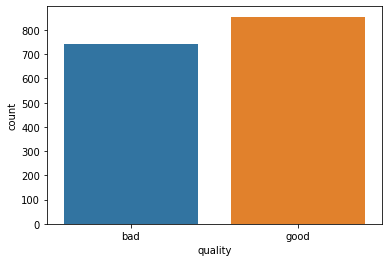

In [82]:
sns.countplot(df['quality']);

- plot shows that there is no big difference between bad & good quality of wine after converting to binary class of target variable.
- There is no problem of class imbalance

In [83]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


- Now The target column shows binary class good & bad after converting from multiclass to binary class

## Label Encoding Target Variable

In [84]:
lencode=LabelEncoder()
df['quality']=lencode.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


- After Label encoding target variable 0: represent bad quality & 1: represent good quality

In [85]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

- There is no object data types present in a dataset.
- only target variable is int and rest all float variables.

In [86]:
df.shape

(1599, 12)

- Dataset has 1599 rows
- Dataset has 12 column

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 143.8 KB


- shows 11 float vbariables & int variable
- Target variable(quality) is int variable
- index 0 is fixed acidity & index 11 is quality variables
- total no of rows is equal to 1599

In [88]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


- The mean is more than median (50th Percentile) in all columns
- There is a large difference in 75% percentile and max value in residual sugar,free sulphur dioxide & total sulphur dioxide.
- The 1 & 2 observations suggest that there are extreme outliers present in these three columns
- High Std Value Indicate Data is highly speaded and possibilty of non normal data.(free suplhur dioxide, total sulphur dioxide)

## Pairplot

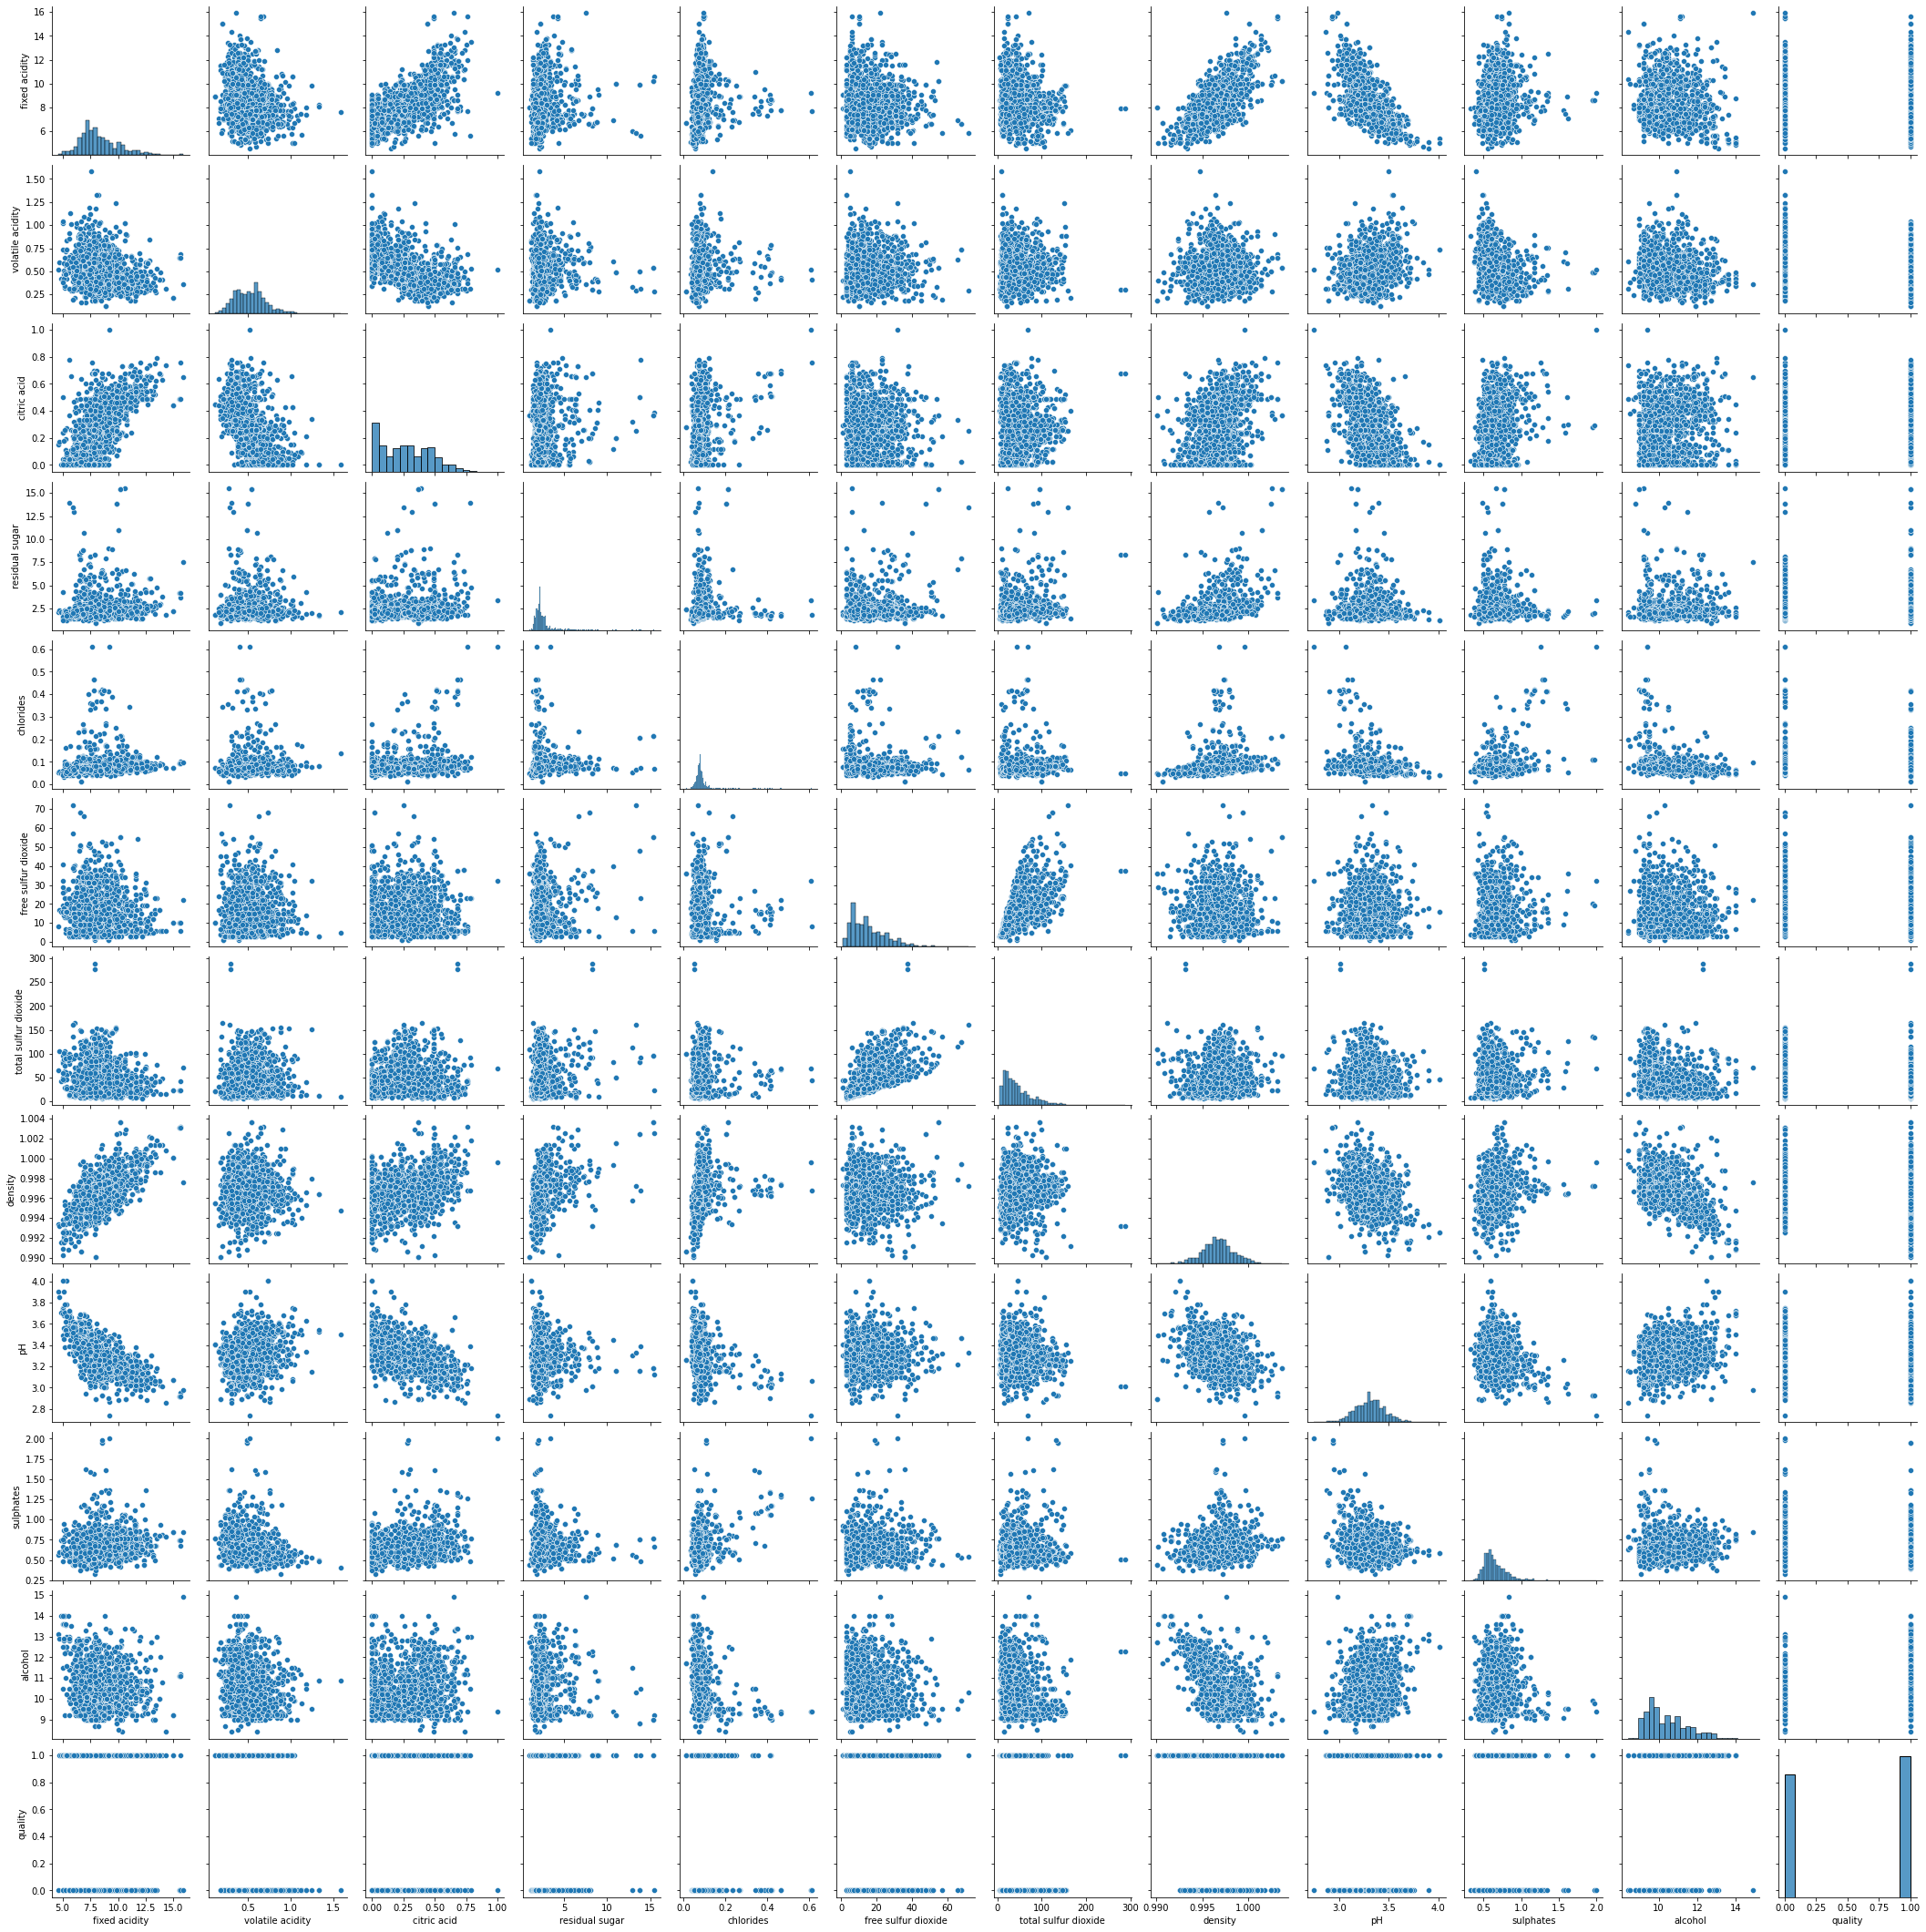

In [89]:
sns.pairplot(df)

- Most of the dataset are forming non linear realtionship with each other
- fixed acidity having non linear relationship with alcohol & sulphates
- fixed acidity has negative linear relationship with pH
- fixed acidity has positive linear relationship with density & citric acid
- density  positive linear relationship  fixed acidity
- ph has negative linear relationship with fixed acidity

### Missing Value Detection :

In [90]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Obs : 
    - There is no missing value in a dataset.

## Skewness Detection 

In [91]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

Observation : 
    - free sulphur dioxide =  Positive Skewness
    - total sulphur dioxide = Positive Skewness
    - residual sugar = High Positive Skewness Observed
    - chlorides = High Positive Skewness
    - sulphates = High Positive Skewness
    - fixed acidity = low positive skewness seen

## Histogram plot to visualize for skewness

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

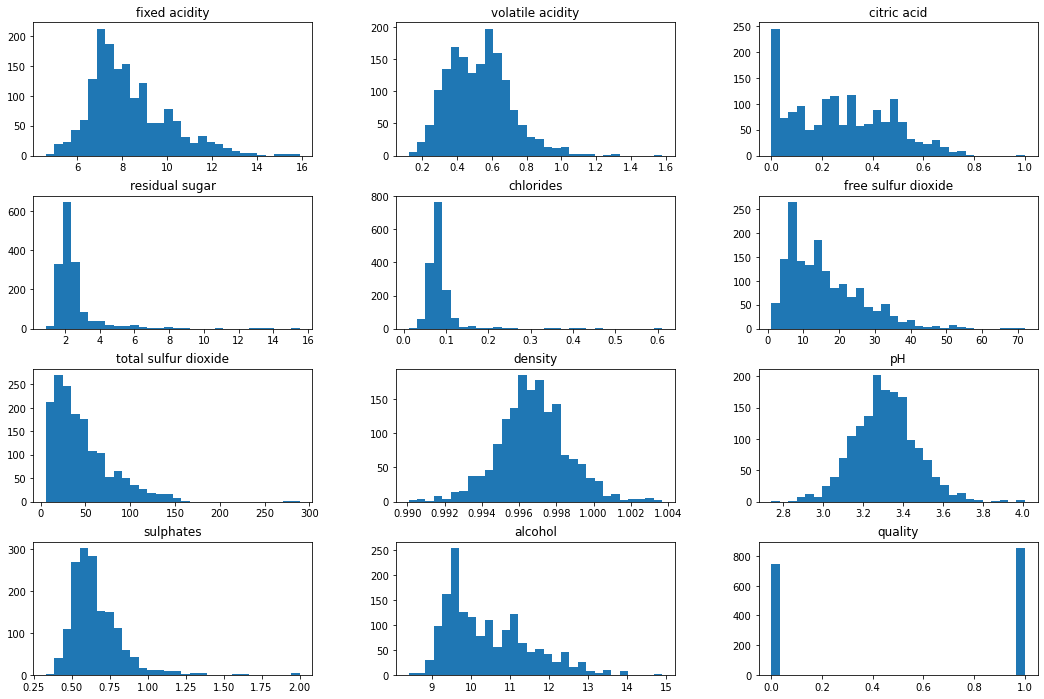

In [92]:
df.hist(grid=False, figsize=(18,12), bins=30)

- Histplot shows presence of skewness in sulphates, total & free sulphur chloride
- residual sugar - Right Skewd         
- chlorides - Right Skewd                
- free sulfur dioxide - Right Skewd      
- total sulfur dioxide - Right Skewd      

## Dist plot to detect skewness in variables

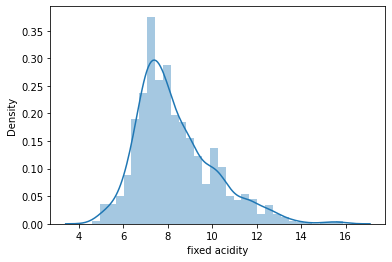

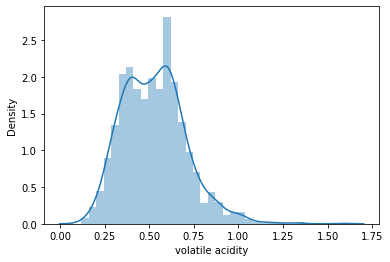

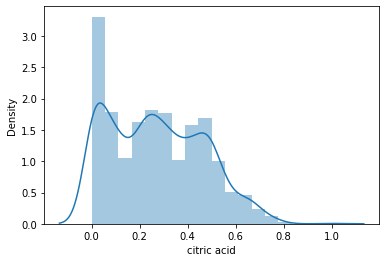

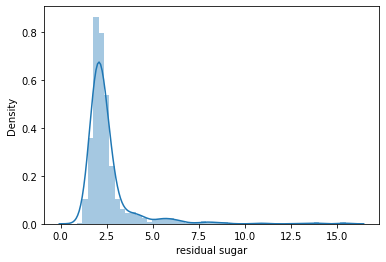

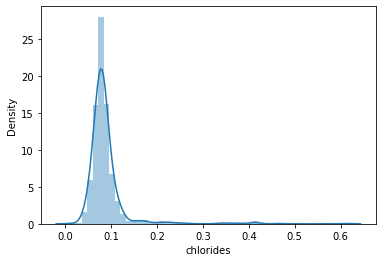

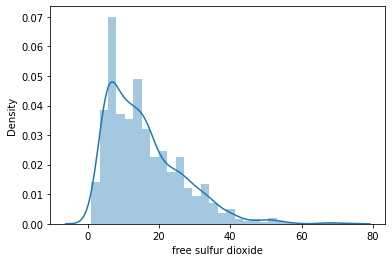

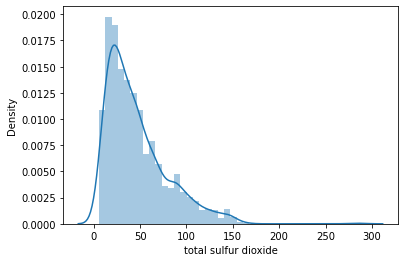

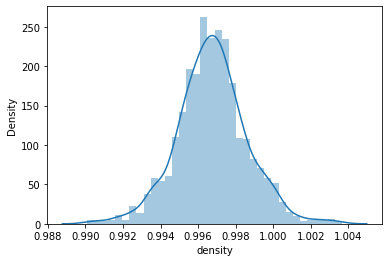

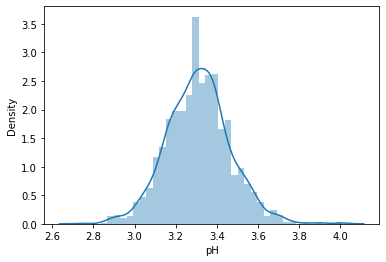

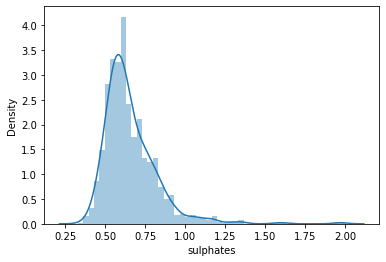

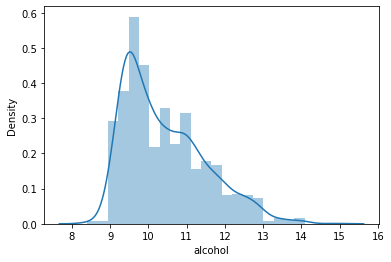

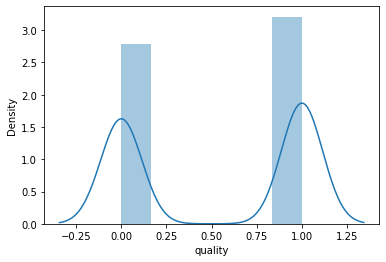

In [93]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- distplot also shows presence of skewness in sulphates, total & free sulphur chloride
- residual sugar - Right Skewd         
- chlorides - Right Skewd                
- free sulfur dioxide - Right Skewd      
- total sulfur dioxide - Right Skewd      

## Outliers Detection 

<AxesSubplot:>

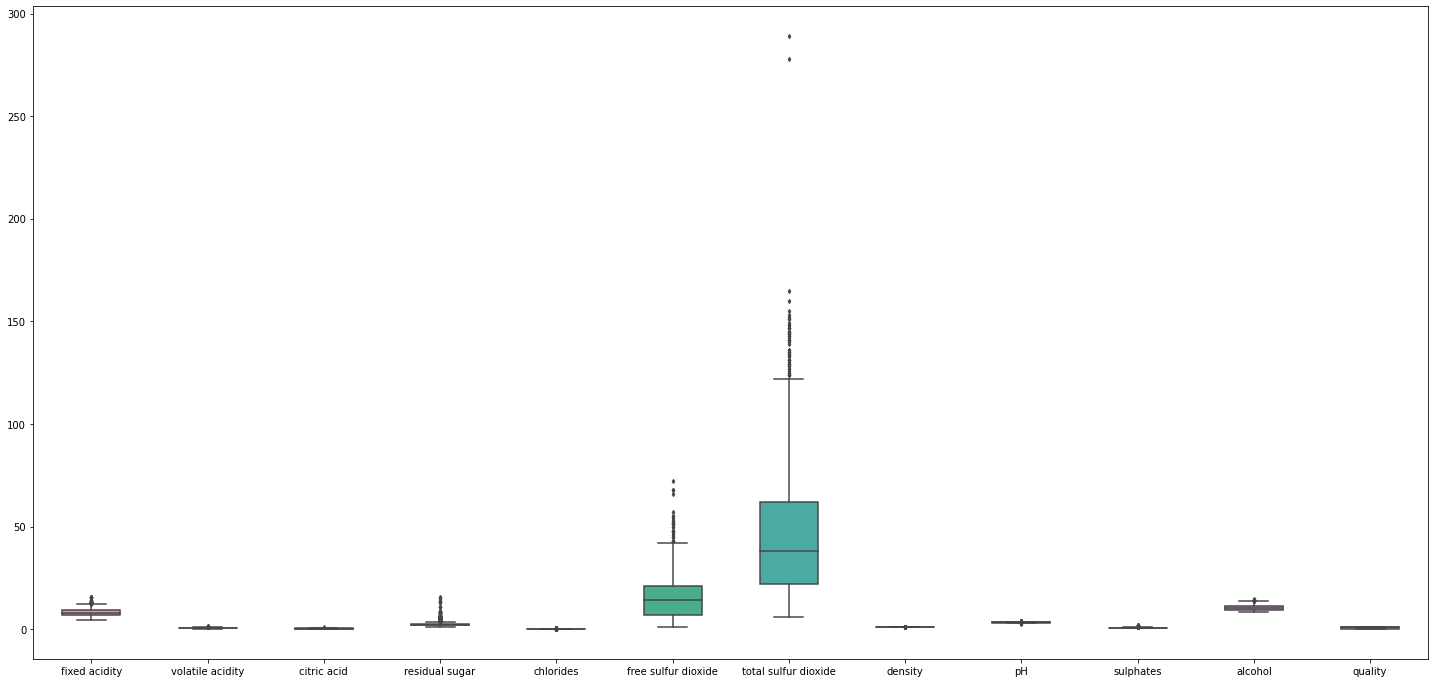

In [94]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- Free Sulphur Dioxide = Larger Value of Outliers Seen 
- Free Sulphur Dioxide = Outliers are Present
- residual sugar = outliers are present
- fixed acidity = outliers are present

## Correlation & HeatMap

In [95]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


- density & fixed acidity is positive correlation with value of 0.66 
- citric acid & fixed acidity has positive correlation with value of 0.67
- ph shows negative correlation with fixed acidty with value of -0.68
- Total sulphur dioxide and free sulphur dioxide shows positive correlation with value of 0.66

<AxesSubplot:>

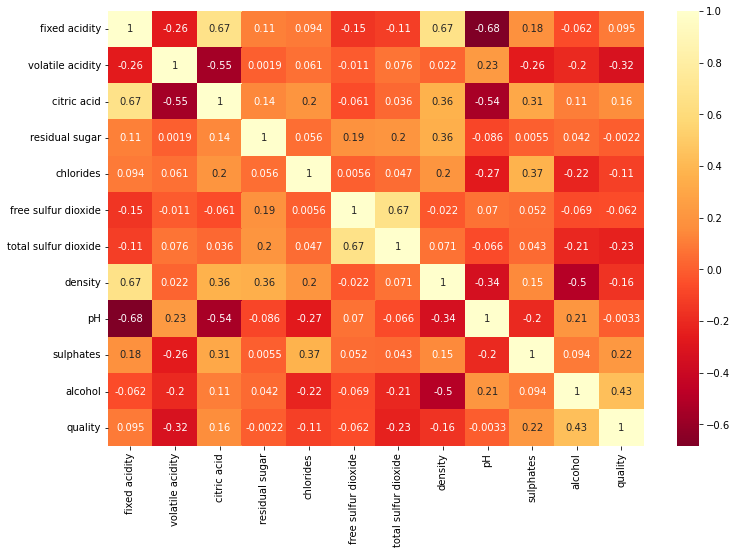

In [96]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

- Target varaible (quality) shows positive correlation witrh alcohol with value of 0.43 
- Target shows  Slight positive correlation with sulphates with value off 0.22
- Target shows high negative correlation with volatile acidity

- fixed acity has positive correlation with citric acid and density with value of 0.67
- Density shows high negative correlation with alcohol
- alcohol & quality has some positive correlation
- free sulphur chloride shows some good correlation with total sulphur chloride

### MultiCollinearity Test : Variation Infaltion Factor

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [99]:
vif_calc()

     VIF Factor              features
0     74.570515         fixed acidity
1     17.637391      volatile acidity
2      9.206433           citric acid
3      4.664173        residual sugar
4      6.590199             chlorides
5      6.484858   free sulfur dioxide
6      6.705199  total sulfur dioxide
7   1482.761771               density
8   1071.613969                    pH
9     22.260206             sulphates
10   140.353284               alcohol
11     3.054342               quality


- Density & pH shows some multicolinearity realtionship.
- Alcohol also has high VIF value.

### Outliers Removal & Percentage of Outliers present.

- fixed acidity, free & total sulphur chloride has high outliers
- but the total percentage of outliers is greater then 8% hence outliers are not removed

## Dividing Dataset in x & y variables 

In [102]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

-Dividing whole dataset in x & y dataset  where y is the target variable

In [103]:
x.shape

(1599, 11)

- x dataset having 1599 rows & 11 column without removing outliers as outliers was > 8% so outliers not removed

In [104]:
y.shape

(1599,)

- Target Variable having 1599 rows without removing outliers

In [105]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


- x varibles without target variable

# Removing Skewness from a dataset

### Power transform for removing positive & negative skewness

In [106]:
from sklearn.preprocessing import power_transform # Importing power tranform
df=power_transform(df,method='yeo-johnson') # Applying power transform to whole dataframe

In [107]:
x.skew() # both positive & Negative Skewness is reduced in all Variables.

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

- even after power tranform skewness still there 
- residual sugar, chlorides, free & total sulphur dioxide shows high positive skewness

## Square root method to remove right or positive skewed data.

In [108]:
import numpy as np
x['chlorides']=np.sqrt(x['chlorides'])
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               3.708789
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

- chlorides skewness reduced to 3.7

In [109]:
import numpy as np
x['residual sugar']=np.sqrt(x['residual sugar'])
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.956763
chlorides               3.708789
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

- residual sugar skewness further reduced to 2.9

In [110]:
import numpy as np
x['total sulfur dioxide']=np.sqrt(x['total sulfur dioxide'])
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.956763
chlorides               3.708789
free sulfur dioxide     1.250567
total sulfur dioxide    0.640439
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

- total sulphur dioxide skewness further reduced to 0.64

In [111]:
import numpy as np
x['chlorides']=np.sqrt(x['chlorides'])
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.956763
chlorides               2.735462
free sulfur dioxide     1.250567
total sulfur dioxide    0.640439
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

- chlorides skewness further reduced to 2.7

In [112]:
import numpy as np
x['residual sugar']=np.sqrt(x['residual sugar'])
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.336660
chlorides               2.735462
free sulfur dioxide     1.250567
total sulfur dioxide    0.640439
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [113]:
import numpy as np
x['residual sugar']=np.sqrt(x['residual sugar'])
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.061917
chlorides               2.735462
free sulfur dioxide     1.250567
total sulfur dioxide    0.640439
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [114]:
import numpy as np
x['residual sugar']=np.sqrt(x['residual sugar'])
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.932110
chlorides               2.735462
free sulfur dioxide     1.250567
total sulfur dioxide    0.640439
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [115]:
import numpy as np
x['fixed acidity']=np.sqrt(x['fixed acidity'])
x.skew()

fixed acidity           0.685006
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.932110
chlorides               2.735462
free sulfur dioxide     1.250567
total sulfur dioxide    0.640439
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [116]:
import numpy as np
x['sulphates']=np.sqrt(x['sulphates'])
x.skew()

fixed acidity           0.685006
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.932110
chlorides               2.735462
free sulfur dioxide     1.250567
total sulfur dioxide    0.640439
density                 0.071288
pH                      0.193683
sulphates               1.554542
alcohol                 0.860829
dtype: float64

- Sulphates skewness further reduced to 1.55

In [ ]:
import numpy as np
x['alcohol']=np.sqrt(x['alcohol'])
x.skew()

- alcohol skewness reduced to 0.75

- Square method is applied multiple times to the same variables which was having high skewness

## Verfifying Skewness with Histplot

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

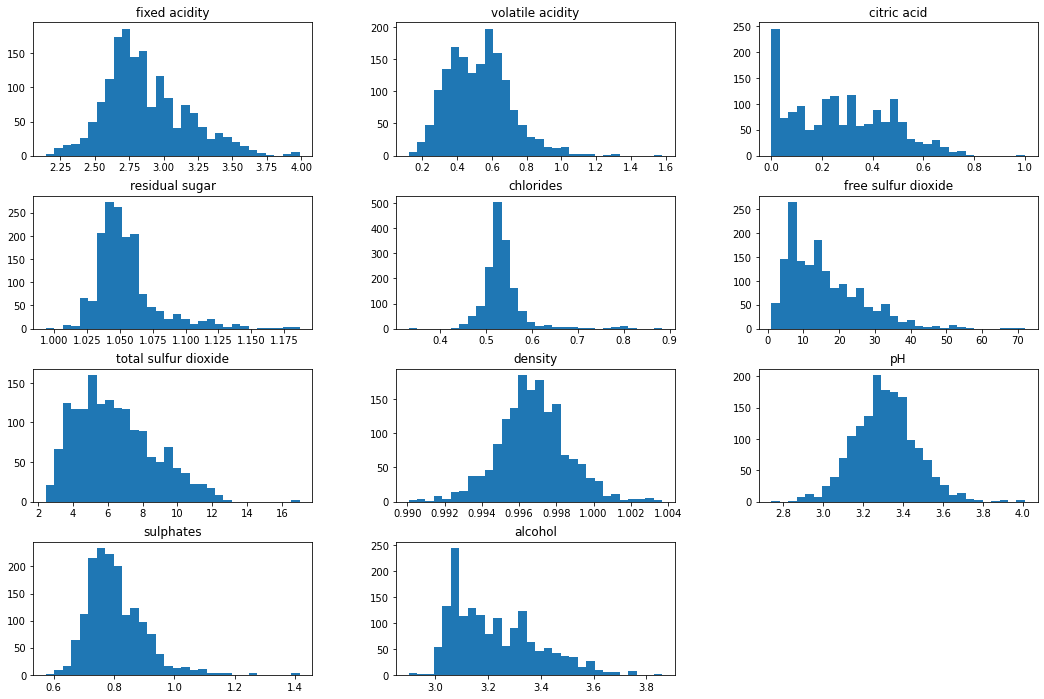

In [118]:
x.hist(grid=False, figsize=(18,12), bins=30)

- with power transform & square root method skewness is reduced to great extent as seen histogram plot

## Verfifying Skewness with Distplot

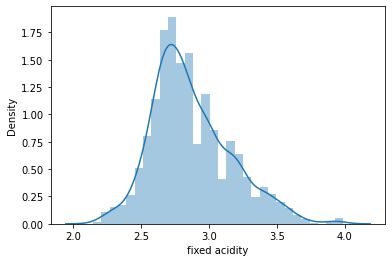

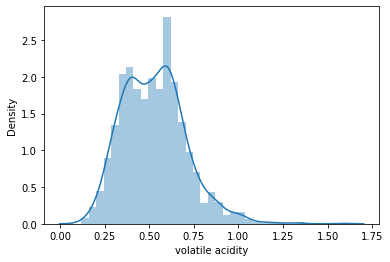

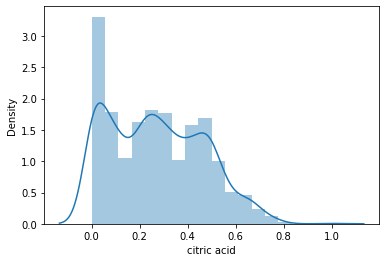

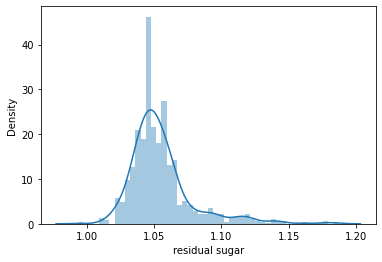

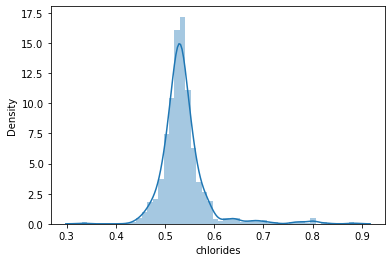

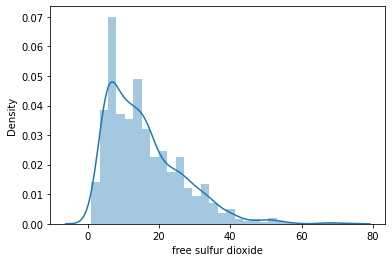

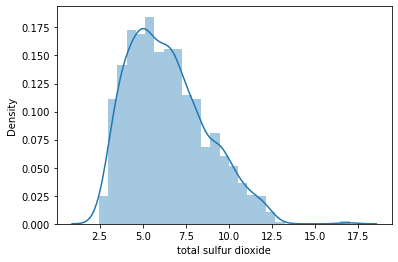

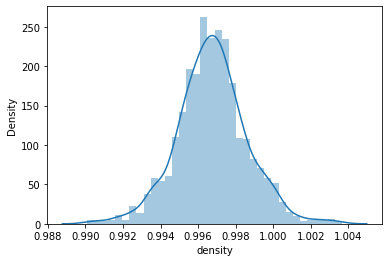

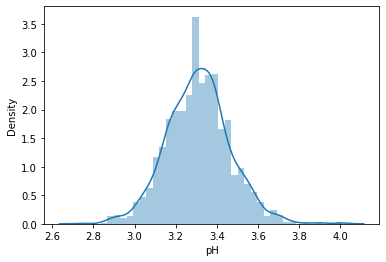

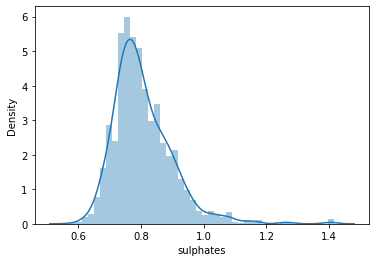

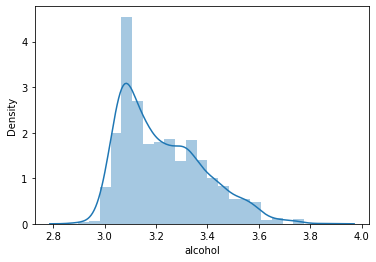

In [119]:
for i in x:
    plt.figure()
    sns.distplot(x[i])

- with power transform & square root method skewness is reduced to great extent which is also visble in above dist plot

## Scaling the independent variables

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[-0.51042403,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.59899174, -0.97783858],
       [-0.2622597 ,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.19882921, -0.57947116],
       [-0.2622597 ,  1.29706527, -1.18607043, ..., -0.33117661,
         0.00645454, -0.57947116],
       ...,
       [-1.22978483, -0.09955388, -0.72391627, ...,  0.70550789,
         0.63182637,  0.56916204],
       [-1.50679901,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.3870051 , -0.18915406],
       [-1.43668677, -1.21684919,  1.02199944, ...,  0.51112954,
         0.07106344,  0.56916204]])

- fixed acidity, free & total sulphur chloride variable is not having values in range with rest all variables.
- Also not falling in the same range with rest all others, so standard scaler is used to treat the same.

## Decision tree classifier is applied for 200 random state

In [122]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  
    
# Obs : Above code is predicting accuracy for 200 random state with decision tree classifier 

71.02272727272727 at random_state 0
75.0 at random_state 1
75.9469696969697 at random_state 2
78.59848484848484 at random_state 3
72.91666666666666 at random_state 4
73.10606060606061 at random_state 5
75.37878787878788 at random_state 6
72.72727272727273 at random_state 7
73.10606060606061 at random_state 8
74.0530303030303 at random_state 9
74.81060606060606 at random_state 10
72.72727272727273 at random_state 11
76.32575757575758 at random_state 12
74.24242424242425 at random_state 13
72.1590909090909 at random_state 14
73.48484848484848 at random_state 15
69.88636363636364 at random_state 16
76.32575757575758 at random_state 17
70.26515151515152 at random_state 18
75.56818181818183 at random_state 19
70.83333333333334 at random_state 20
75.75757575757575 at random_state 21
71.78030303030303 at random_state 22
75.0 at random_state 23
76.13636363636364 at random_state 24
72.91666666666666 at random_state 25
73.48484848484848 at random_state 26
73.67424242424242 at random_state 27
74.

## Decision tree is configured to select best random state with high accuracy

In [123]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8041666666666667  on Random_state  138


-Obs : Above code is used to select best random sate out of 200 random state which is 138 with accuracy of 80%

##  Splitting dataset x train, x test, y train y test 

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 138)

- Dataset is divided in x-train,x-test,y-train,y-test  with best random state value of 138
- Ratio is 70% train data & 30% test data

## Logistic Regression

In [125]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
acc = classification_report(y_test, pred)
print(acc)

# Obs : Logistic Regression is giving 76% Accuracy

[0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1
 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1
 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1
 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1
 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0]
              precision   

# Decision Tree Classifier

In [126]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs Decision Tree Classifier is giving 80% Accuracy on y test data

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       224
           1       0.82      0.79      0.81       256

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



# Random Forest Classifier

In [127]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is  giving 83% acc on y test data

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       224
           1       0.84      0.84      0.84       256

    accuracy                           0.83       480
   macro avg       0.83      0.83      0.83       480
weighted avg       0.83      0.83      0.83       480



# Support Vector Regressor

In [128]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Support vector classifier is giving 78% acc on y test data

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       224
           1       0.82      0.77      0.79       256

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.79      0.78      0.78       480



# Knn Classifier

In [129]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs KNN is giving 78% accuracy on y test data

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       224
           1       0.82      0.77      0.79       256

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.79      0.78      0.78       480



# Kfold Cross Validation

In [130]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [131]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [132]:
print(cross_val_score(lg,x,y,cv=cross_validation).mean()) # Logistic regression CV o/p

0.7404623824451411


In [133]:
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) # Decision Tree Classifier CV o/p

0.7535932601880877


In [134]:
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.8136304858934171


In [135]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Support vector Regressor  CV o/p

0.7635795454545453


In [136]:
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) # knn classifier  CV o/p

0.7223197492163009


- Comparision Table of Model Accuracy with CV Value:
- 1. Lg  = 76% - 74.04% = 1.96
- 2. DTC = 80% - 75.35% = 4.65
- 3. RFC = 83% - 81.36% = 1.64
- 4. SV  = 78%  -76.35% = 1.65
- 5. KNN = 78% - 72.23% = 5.77
- Random Forest Has least Difference Value & believe to be the best model 

# GridSearch CV

In [137]:
from sklearn.model_selection import GridSearchCV # Importing Gridsearch CV from sklearn

In [138]:
import numpy as np
parameter = {'max_depth' : np.arange(2,10),
            'criterion':['gini','entropy'],
            'n_estimators' : [100],
            'max_features' : ['auto','sqrt','log2']}

In [139]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)

-Obs : Applying Gridsearch to best model random forest classifier 

In [140]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [141]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

- Best Parameter is selected from grid search CV which is 
- 'criterion': 'gini','max_depth': 9,'max_features': 'sqrt','n_estimators': 'best'

# Best Gridsearch parameter applied to best model

In [142]:
Final_mod = RandomForestClassifier(criterion = 'entropy', max_depth = 8,max_features='auto',n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.08333333333333


-Obs :  Final Accuracy of the best model = 82.08

# Importing AUC-ROC and metrics

In [143]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

-Obs : Importing roc_curve & ruc_auc_score metrics from sklearn.

# AUC ROC Curve

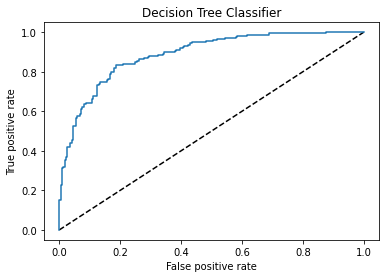

0.8197544642857143

In [144]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

In [ ]:
ObS : ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the
curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is 
closer to top left corner hence I believe the model will give better performance.

# Exporting Model file with joblib library

In [ ]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

-Obs :  Exporting ML Model as .pkl file with joblib library